## Analysis and Prediction of Black Friday Sales using Machine Learning Algorithms :

Black Friday is an informal name used to describe the day after Thanksgiving. It's often the busiest shopping day of the year because it kicks off the holiday season. This season is crucial for the economy, especially for some retailers, such as jewelers.
According to the National Retail Federation (NRF), 84.2 million people shopped in stores on Black Friday in 2019, and 37.8 million people shopped in stores on Thanksgiving Day. A total of 189.6 million people shopped over the four-day Black Friday weekend in 2019, a 14% increase over 2018.1 Black Friday wasn't the biggest shopping day of the year in 2019, though. That honor went to Super Saturday, which is the Saturday before Christmas.
Black Friday is part of the holiday shopping season. Having a profitable Black Friday is essential for many retailers, especially toy and game stores. The holiday season amounts to almost 20% or more of annual sales for many retailers, according to the NRF.
Some retailers start their Black Friday sales on Thanksgiving Day, and deals typically run throughout the weekend. In 2019, shoppers spent an average of 361.90 dollars from Thanksgiving through Cyber Monday (the first Monday after Thanksgiving). To put that into perspective, shoppers were expected to spend about 1,007 dollars each during the entire holiday season in 2018.
In 2020, shoppers plan to spend about a Thousand Dollars on gifts, decorations, food, and other purchases for themselves and their families.


## Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import dataset


In [2]:
sales = pd.read_csv("blackFriday_train.csv")
test = pd.read_csv('blackFriday_test.csv')
sales.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Observations:-
Firstly, we explore the dataset.
#### Features of dataset

- User_ID : User ID

- Product_ID : Product ID

- Gender : Sex of User

- Age : Age in bins

- Occupation : Occupation (Masked)

- City_Category : Category of the City (A,B,C)

- Stay_In_Current_City_Years: Number of years stay in current city

- Marital_Status: Marital Status

- Product_Category_1: Product Category (Masked)

- Product_Category_2 : Product may belongs to other category also (Masked)

- Product_Category_3: Product may belongs to other category also (Masked)

- Purchase : Purchase Amount (Target Variable)

In [3]:
test.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
#for submission

submission = pd.DataFrame()

submission['User_ID'] = test['User_ID']
submission['Product_ID'] = test['Product_ID']
submission['Purchase'] = np.nan

In [5]:
submission


,User_ID,Product_ID,Purchase
0,1000004,P00128942,NaN
1,1000009,P00113442,NaN
2,1000010,P00288442,NaN
3,1000010,P00145342,NaN
4,1000011,P00053842,NaN
...,...,...,...
233594,1006036,P00118942,NaN
233595,1006036,P00254642,NaN
233596,1006036,P00031842,NaN
233597,1006037,P00124742,NaN


## Data exploration


In [6]:
sales.shape


(550068, 12)

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### Looking at the data, we can conclude that our set possesses 12 different parameters: 7 numerical (integer and float) and 5 object variables.

In [8]:
sales.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## There are 12 features, looking into each of these features:

### 1. User ID: Each user has been provided a unique ID. Lets see how many unique users we have in our dataset


In [9]:
sales.User_ID.nunique()


5891

### There are 5891 unique users in our dataset and none of the value in this feature is null

### 2. Product_ID: Each product that is available for sales has a specific/ unique product id associated with it. Lets look into the number of unique products available for sale.


In [10]:
sales.Product_ID.nunique()


3631

### So there are a total of 3631 products available for sales.



### 3.Gender: Gender is a categorical variables with 2 categries: Male(M) and Female(F).


In [11]:
sales.Gender.value_counts(normalize=True)*100


M    75.310507
F    24.689493
Name: Gender, dtype: float64

### There are no null values in this feature and Males constitute 75% of the data.

### 4. Age: Age is again a categorical data with age divide in particular range.


In [12]:
sales.Age.value_counts()


26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

### The age is divide in 7 categories i.e 0-17,18-25,26-35,36-45,46-50,51-55,55+ . The bins size here is varing.

### 5. Occupation: The Occupation number is the ID number of occupation type of each customer. We can see that around 21 different occupations exist.


In [13]:
sales.Occupation.nunique()


21

### 6.City_Category : The city has been categorised into 3 categories i.e A,B,C.


In [14]:
sales.City_Category.value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

### 7. Stay_In_Current_City_Years : This depects the numbers of year from which a person is residing in that particular city. It has been divided into 5 categories


In [15]:
sales.Stay_In_Current_City_Years.value_counts()


1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

### 8.Marital_Status: This features shows if a person is married or not.


In [16]:
sales.Marital_Status.value_counts()


0    324731
1    225337
Name: Marital_Status, dtype: int64

### The products have been categorised into three categories with represent three different features:

### 9.Product_Category_1

### 10.Product_Category_2

### 11.Product_Category_3



### 12. Purchase: This is our final feature which is our dependent variables whose value we want to predict, the purchase amount. It is a contionous variable so this makes it a regression problem.


## Missing data

In [17]:
# lets combine the data for data prep

test['Purchase']=np.nan
sales['data']='train'
test['data']='test'
test=test[sales.columns]
combined=pd.concat([sales,test],axis=0)

In [18]:
test.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN,test
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN,test
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN,test
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN,test
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN,test


In [19]:
combined.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,train


In [20]:
sales.isna().sum().sort_values(ascending=False)


Product_Category_3            383247
Product_Category_2            173638
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Purchase                           0
data                               0
dtype: int64

<AxesSubplot:>

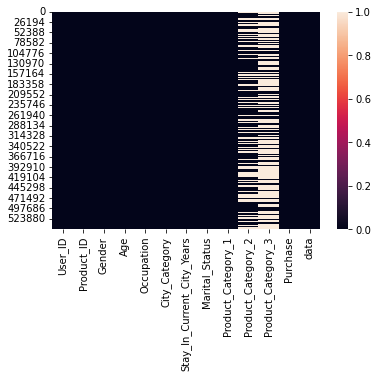

In [21]:
sns.heatmap(sales.isna())


### Here we can see that there are 2 features which contain the missing values i.e Product_Category_2 and Product_Category_3.



In [22]:
#percent of missing data relevant to all data
percent = (sales.isnull().sum()/sales.isnull().count()).sort_values(ascending=False)
percent

Product_Category_3            0.696727
Product_Category_2            0.315666
User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Purchase                      0.000000
data                          0.000000
dtype: float64

### The feature Product_Category_3 has 70% data missing so imputing this much data is not feasible , so it is better to drop this feature

In [23]:
combined.drop('Product_Category_3',axis=1,inplace=True)


### The feature Product_Category_2 has 30% data missing so we can impute values into this using an appromiate method.



In [24]:
combined.Product_Category_2.value_counts()


8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

### These are almost 18 categories in which these Product_Category_2 is divided ,imputing the mean value does make sense because that gives a decimal term 9.8 which is not a product category here. So, there are 2 possible ways median or mode.



In [25]:
#imputed missing values with random values in the same probability distribution as given feature already had

vc = combined.Product_Category_2.value_counts(normalize = True)
miss = combined.Product_Category_2.isna()
combined.loc[miss, 'Product_Category_2'] = np.random.choice(vc.index, size = miss.sum(), p = vc.values)

In [26]:
combined.Product_Category_2.value_counts()


8.0     132897
14.0    114727
2.0     103034
16.0     89929
15.0     78832
5.0      54246
4.0      53488
6.0      34349
11.0     29578
17.0     27879
13.0     21969
9.0      11842
12.0     11358
10.0      6472
3.0       5932
18.0      5865
7.0       1270
Name: Product_Category_2, dtype: int64

In [27]:
combined.isna().sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Purchase                      233599
data                               0
dtype: int64

### There are no null values left in the data set.The purchase null values are because of the test data that needs to be predicted

## Exploratory Data Analysis

In [28]:
#using the train data part from combined dataset for eda

sales_1 = combined[combined['data']=='train']

## Univariate Analysis:

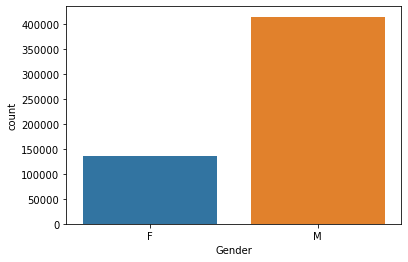

In [29]:
sns.countplot(sales_1['Gender'])
plt.show()

### The graph shows that there are almost 3 times more male customers than female customers.

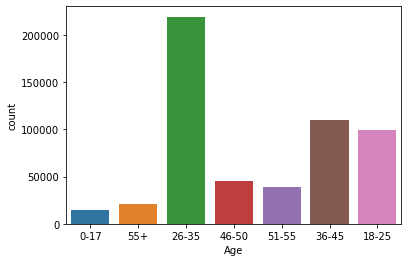

In [30]:
sns.countplot(sales_1['Age'])
plt.show()

### The graph shows that the majority of the customers that purchase things during the sales season mainly belong to the age group of 26-35 and 36-45.



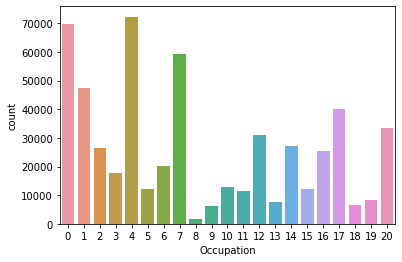

In [31]:
sns.countplot(sales_1['Occupation'])
plt.show()

### The graph shows that top three Occupations with the majority of buyers is 4,0,7.

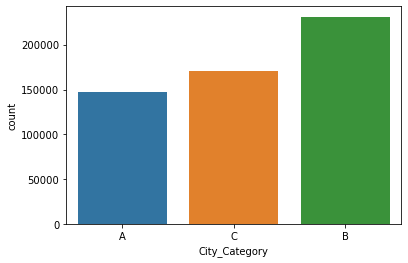

In [32]:
sns.countplot(sales_1['City_Category'])
plt.show()

### The graph shows that people from city B buy majorly during the sale

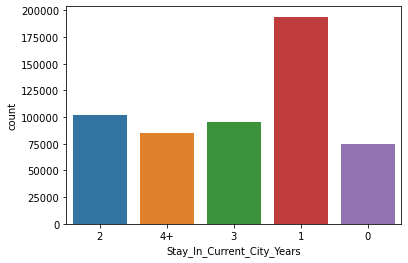

In [33]:
sns.countplot(sales_1['Stay_In_Current_City_Years'])
plt.show()

### The graph shows that majority people buying during sales have lived in the current city for an year.

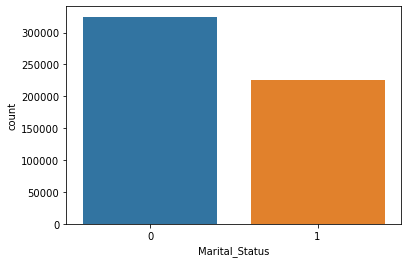

In [34]:
sns.countplot(sales_1['Marital_Status'])
plt.show()

### The graphs shows that single people tend to buy more things during sales.

## Bivariate Analysis / Multivariate Analysis:

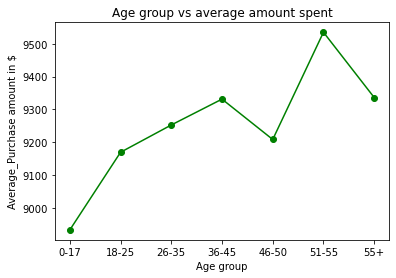

In [35]:
# Avearge amount spend by different age groups

data = sales_1.groupby('Age')['Purchase'].mean()
plt.plot(data.index,data.values,marker='o',color='g')
plt.xlabel('Age group');
plt.ylabel('Average_Purchase amount in $');
plt.title('Age group vs average amount spent');
plt.show()

### The average amount spend by age group 51-55 is most during the festive season sales.

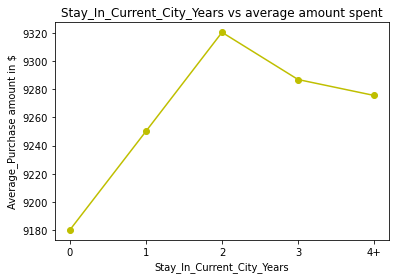

In [36]:
# Avearge amount spend based on the time of stay in the current city

data = sales_1.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
plt.plot(data.index,data.values,marker='o',color='y')
plt.xlabel('Stay_In_Current_City_Years');
plt.ylabel('Average_Purchase amount in $');
plt.title('Stay_In_Current_City_Years vs average amount spent');
plt.show()

### The people who have been living in the current city for 2 or more years are on an average spending more amount in the black friday sales

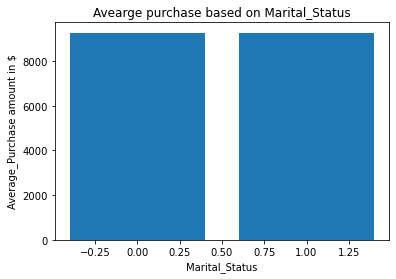

In [37]:
# Avearge purchase based on Marital_Status

data = sales_1.groupby('Marital_Status')['Purchase'].mean()
plt.bar(data.index,data.values)
plt.xlabel('Marital_Status');
plt.ylabel('Average_Purchase amount in $');
plt.title('Avearge purchase based on Marital_Status');
plt.show()

### Purchasers who married or not, have almost same average of purchase.

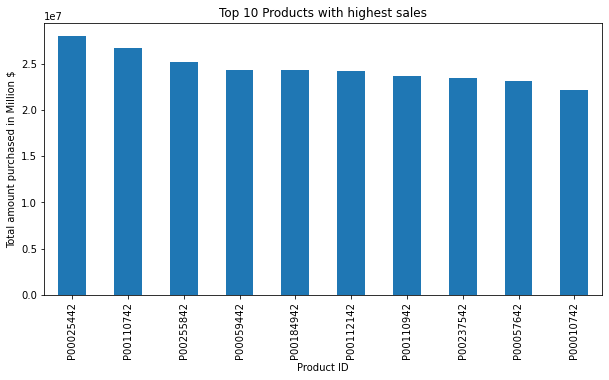

In [38]:
# Top 10 products which made the highest sales

data = sales_1.groupby("Product_ID").sum()['Purchase']

plt.figure(figsize=(10,5))
data.sort_values(ascending=False)[0:10].plot(kind='bar')
plt.xticks(rotation=90)
plt.xlabel('Product ID')
plt.ylabel('Total amount purchased in Million $')
plt.title('Top 10 Products with highest sales')
plt.show()

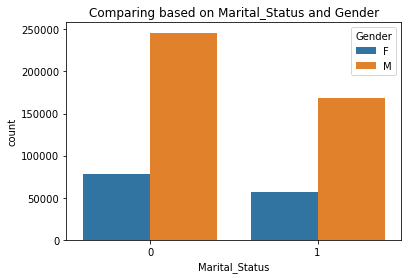

In [39]:
#comparing based on Marital_Status and Gender

sns.countplot(x='Marital_Status',data=sales_1,hue='Gender')
plt.title('Comparing based on Marital_Status and Gender')
plt.show()

### Males tend to purchase more and Unmarried Males are around 45% in the data and they show to purchase 9000$ on average

### Products that are most purchased by each of the age group:

In [40]:
a =pd.crosstab(sales_1['Age'],sales_1['Product_ID'])
a.idxmax(axis=1)

Age
0-17     P00255842
18-25    P00265242
26-35    P00265242
36-45    P00025442
46-50    P00265242
51-55    P00265242
55+      P00265242
dtype: object

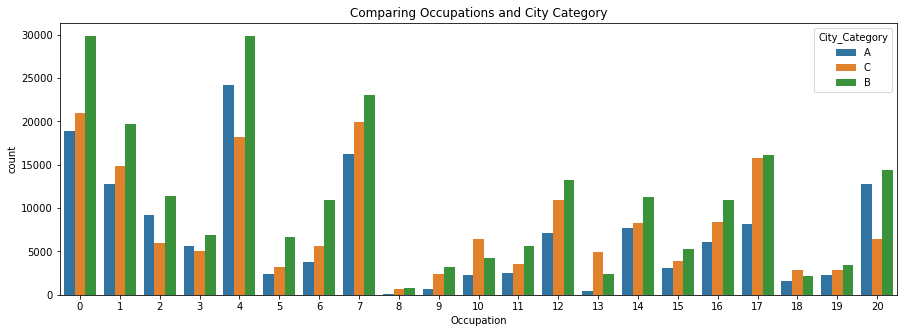

In [41]:
#Occupations and City Category

plt.figure(figsize=(15,5))
sns.countplot(x='Occupation',data=sales_1,hue='City_Category')
plt.title('Comparing Occupations and City Category')
plt.show()

### People from Occupation 4,0,7 are buying the most and most of the people from these occupations belong to City_Category B.

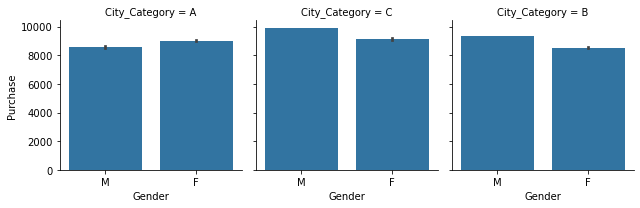

In [42]:
#the purchase habits of different genders across the different city categories.

g = sns.FacetGrid(sales_1,col="City_Category")
g.map(sns.barplot, "Gender", "Purchase")
plt.show()

### For City_categories B and C, Males tend to dominate the purchasing, whereas it is the opposite for City Category_C, where Females tend to purchase more than men.

## Data preprocessing.

In [43]:
# for datapreprocessing again working with the combined dataset
combined.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,8370.0,train
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200.0,train
2,1000001,P00087842,F,0-17,10,A,2,0,12,5.0,1422.0,train
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057.0,train
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,7969.0,train


### 1.User_ID and Product_ID:


In [44]:
# User_ID data preprocess. e.g. 1000002 -> 2

combined['User_ID'] = combined['User_ID'] - 1000000

# Product_ID preprocess e.g. P00069042 -> 69042

combined['Product_ID'] = combined['Product_ID'].str.replace('P00', '')

#object to int
combined['Product_ID'] = pd.to_numeric(combined['Product_ID'],errors='coerce')

In [45]:
combined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int64  
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
 11  data                        783667 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 77.7+ MB


## 2.Product_Category_2 :


### All the unique values in product category 2 are integers. But the data type shown in info is float so we can change it by converting the numbers in float to integers.

In [46]:
combined.Product_Category_2 = combined.Product_Category_2.astype('int64')

In [47]:
# features with datatype object

cat_cols = combined.select_dtypes(['object']).columns
cat_cols

Index(['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years', 'data'], dtype='object')

### 3.Stay_In_Current_City_Years
For Stay in current city years we need to convert the object datatype to int. It contains a category which has '4+' that needs to be altere

In [48]:
# 4+ to 4
combined['Stay_In_Current_City_Years'] =np.where(combined['Stay_In_Current_City_Years'].str[:2]=="4+",4,combined['Stay_In_Current_City_Years'])

#object to int
combined['Stay_In_Current_City_Years'] = pd.to_numeric(combined['Stay_In_Current_City_Years'],errors='coerce')

### 4.Gender:
- Gender 'F' for female are represented by the value fo 0.

- Gender 'M' for male are represented by the value fo 1.

In [49]:
combined['Gender'] = combined['Gender'].map({'F':0, 'M':1}).astype(int)


### 5.Age

In [50]:
# Modify age column

combined['Age'] = combined['Age'].map({'0-17': 9,
                               '18-25': 22,
                               '26-35': 31,
                               '36-45': 42,
                               '46-50': 48,
                               '51-55': 53,
                               '55+': 60})
combined['Age'].value_counts()

31    313015
42    156724
22    141953
48     65278
53     54784
60     30579
9      21334
Name: Age, dtype: int64

### 6.City_Category : dummy variables for this feature


In [51]:
combined = pd.get_dummies(combined,columns=['City_Category'],drop_first = True)

In [52]:
combined.head()


,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,8,8370.0,train,0,0
1,1,248942,0,9,10,2,0,1,6,15200.0,train,0,0
2,1,87842,0,9,10,2,0,12,5,1422.0,train,0,0
3,1,85442,0,9,10,2,0,12,14,1057.0,train,0,0
4,2,285442,1,60,16,4,0,8,9,7969.0,train,0,1


In [53]:
combined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  int64  
 2   Gender                      783667 non-null  int32  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  int64  
 9   Purchase                    550068 non-null  float64
 10  data                        783667 non-null  object 
 11  City_Category_B             783667 non-null  uint8  
 12  City_Category_C             783667 non-null  uint8  
dtypes: float64(1),

In [54]:
combined.head()


,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,data,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,8,8370.0,train,0,0
1,1,248942,0,9,10,2,0,1,6,15200.0,train,0,0
2,1,87842,0,9,10,2,0,12,5,1422.0,train,0,0
3,1,85442,0,9,10,2,0,12,14,1057.0,train,0,0
4,2,285442,1,60,16,4,0,8,9,7969.0,train,0,1


In [55]:
#splitting the data back into train and test as it was already provided

sales = combined[combined['data']=='train']
del sales['data']
test_input = combined[combined['data']=='test']
test_input.drop(['Purchase','data'],axis=1,inplace=True)

del combined

## Normal Distribution curve for every individual column


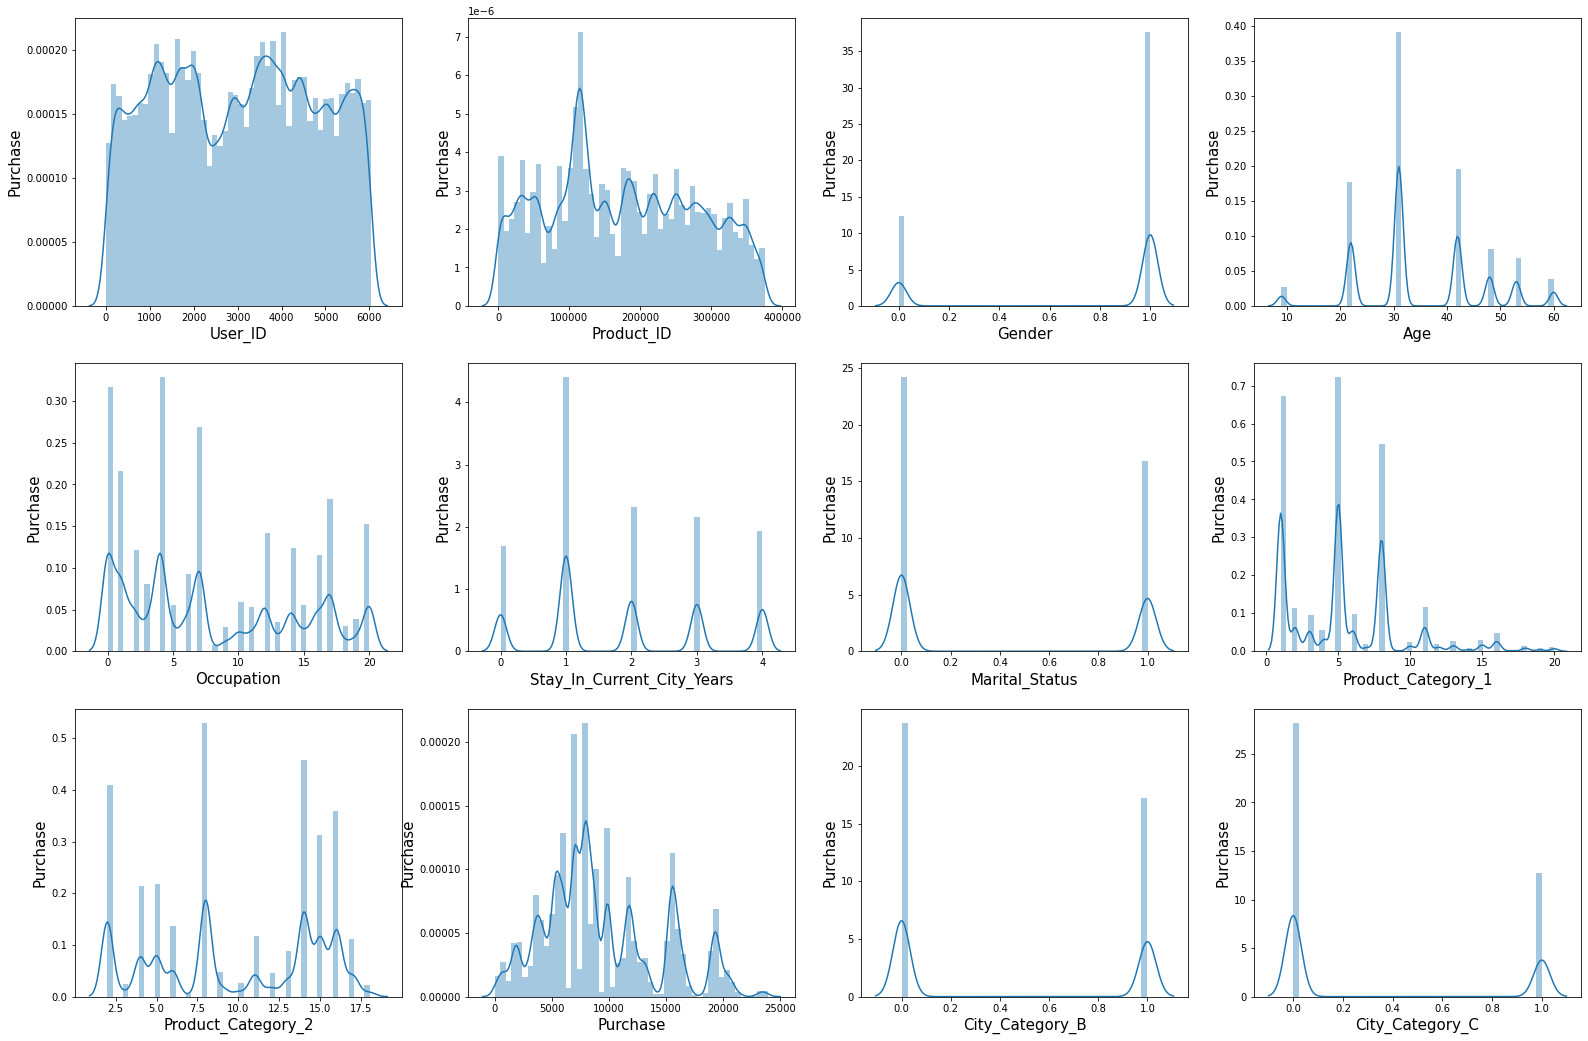

In [56]:
# let's visualize the data using distribution plot
plt.figure(figsize=(27,18))
pn = 1
for col in sales:
    if pn <= 12:
        ax = plt.subplot(3,4,pn)
        sns.distplot(sales[col])
        plt.xlabel(col,fontsize = 15)
        plt.ylabel('Purchase',fontsize = 15)
    pn +=1
plt.show()    

### Checking Outliers

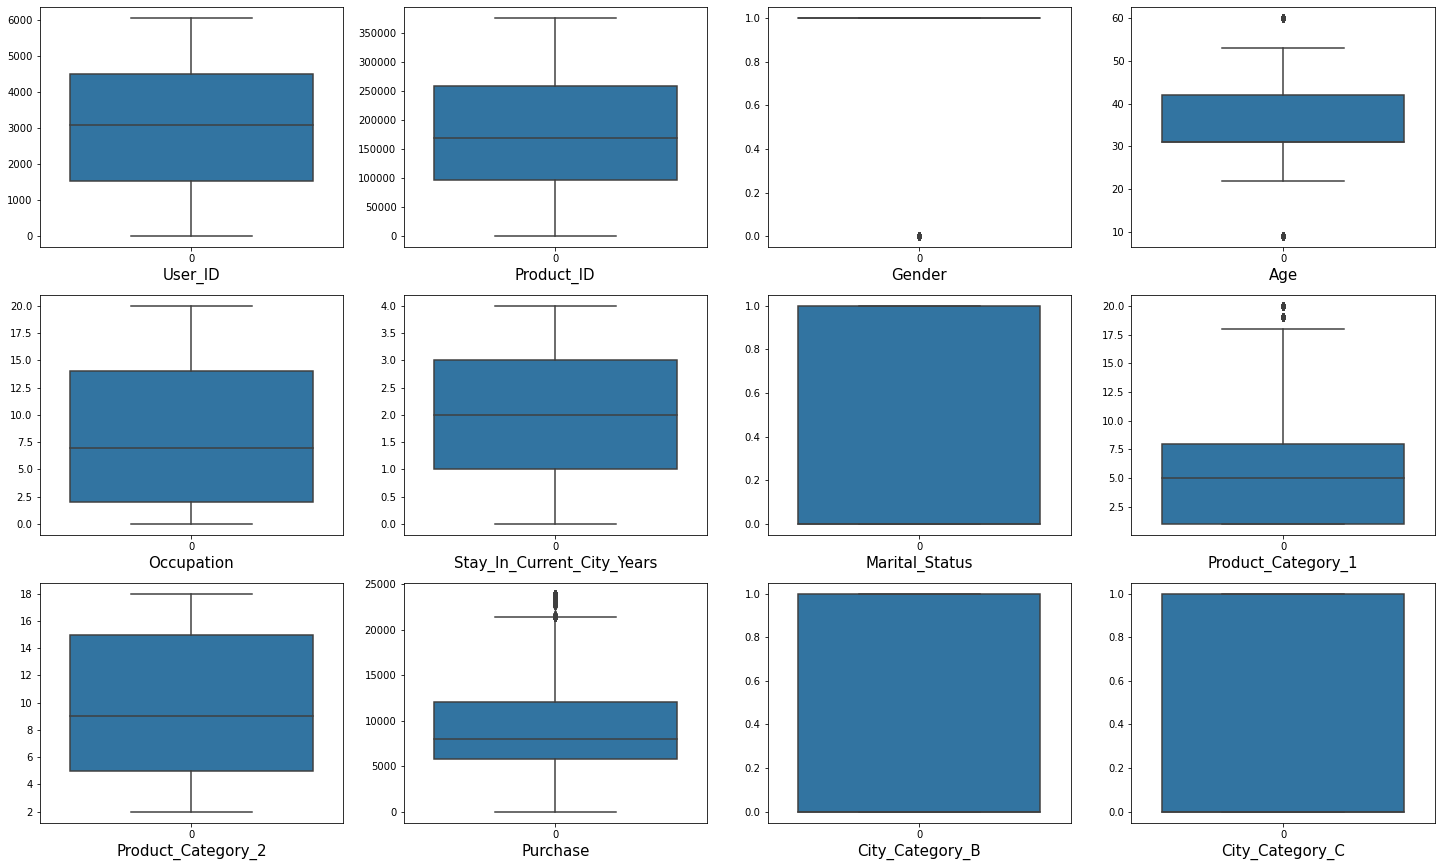

In [57]:
plt.figure(figsize=(25,15))
pn = 1
for col in sales:
    if pn <= 12:
        ax = plt.subplot(3,4,pn)
        sns.boxplot(data=sales[col])
        plt.xlabel(col,fontsize = 15)
    pn +=1
plt.show()    

## Removing Outliers


In [58]:
from scipy.stats import zscore
z = np.abs(zscore(sales))
threshold = 3
df1 = sales[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", sales.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (sales.shape[0]-df1.shape[0])/sales.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (550068, 12)
Shape of the dataframe after removing outliers:  (542790, 12)
Percentage of data loss post outlier removal:  1.3231091428696087


## Correlation


In [59]:
df.corr()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_B,City_Category_C
User_ID,1.000000,-0.018453,-0.033785,0.038621,-0.023765,-0.030903,0.020273,0.002075,-0.001079,0.005622,0.019791,0.007944
Product_ID,-0.018453,1.000000,0.022485,0.027103,0.009282,-0.002916,0.012919,0.039499,0.022313,-0.079720,-0.005317,0.006222
Gender,-0.033785,0.022485,1.000000,-0.002331,0.116892,0.014743,-0.011764,-0.053345,-0.011992,0.062702,-0.006288,-0.000160
Age,0.038621,0.027103,-0.002331,1.000000,0.093011,-0.002096,0.309573,0.055959,0.039815,0.020745,-0.011356,0.096592
Occupation,-0.023765,0.009282,0.116892,0.093011,1.000000,0.030319,0.024348,-0.009725,-0.000260,0.021898,-0.011678,0.034753
Stay_In_Current_City_Years,-0.030903,-0.002916,0.014743,-0.002096,0.030319,1.000000,-0.013094,-0.003330,-0.000954,0.005051,0.011168,0.010585
Marital_Status,0.020273,0.012919,-0.011764,0.309573,0.024348,-0.013094,1.000000,0.018756,0.010468,0.000713,-0.001657,0.033202
Product_Category_1,0.002075,0.039499,-0.053345,0.055959,-0.009725,-0.003330,0.018756,1.000000,0.338537,-0.300663,0.000169,-0.023804
Product_Category_2,-0.001079,0.022313,-0.011992,0.039815,-0.000260,-0.000954,0.010468,0.338537,1.000000,-0.151557,-0.002225,-0.005700
Purchase,0.005622,-0.079720,0.062702,0.020745,0.021898,0.005051,0.000713,-0.300663,-0.151557,1.000000,-0.022818,0.069231


In [60]:
# let's check the correation with Purchase
df.corr()['Purchase'].sort_values()


Product_Category_1           -0.300663
Product_Category_2           -0.151557
Product_ID                   -0.079720
City_Category_B              -0.022818
Marital_Status                0.000713
Stay_In_Current_City_Years    0.005051
User_ID                       0.005622
Age                           0.020745
Occupation                    0.021898
Gender                        0.062702
City_Category_C               0.069231
Purchase                      1.000000
Name: Purchase, dtype: float64

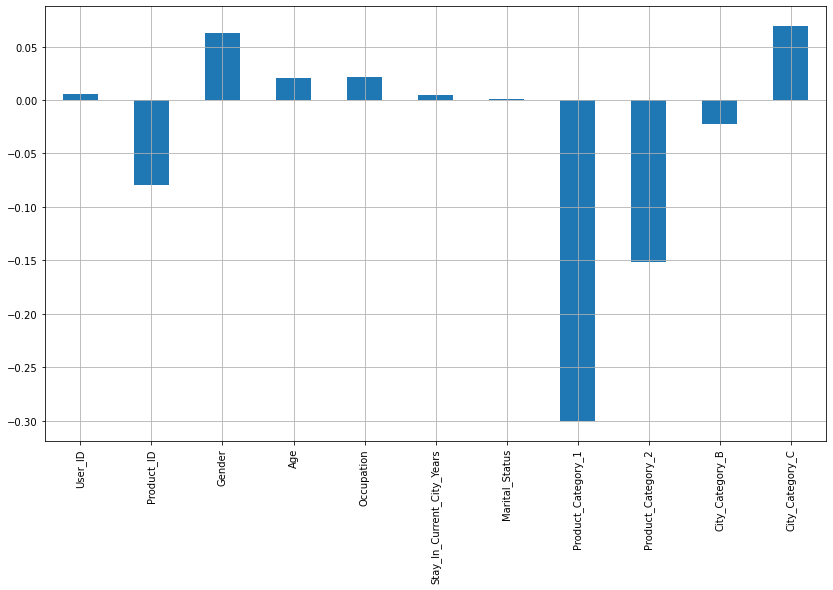

In [61]:
df.drop('Purchase',axis=1).corrwith(df.Purchase).plot(kind='bar',grid=True,figsize=(14,8))
plt.show()

<AxesSubplot:>

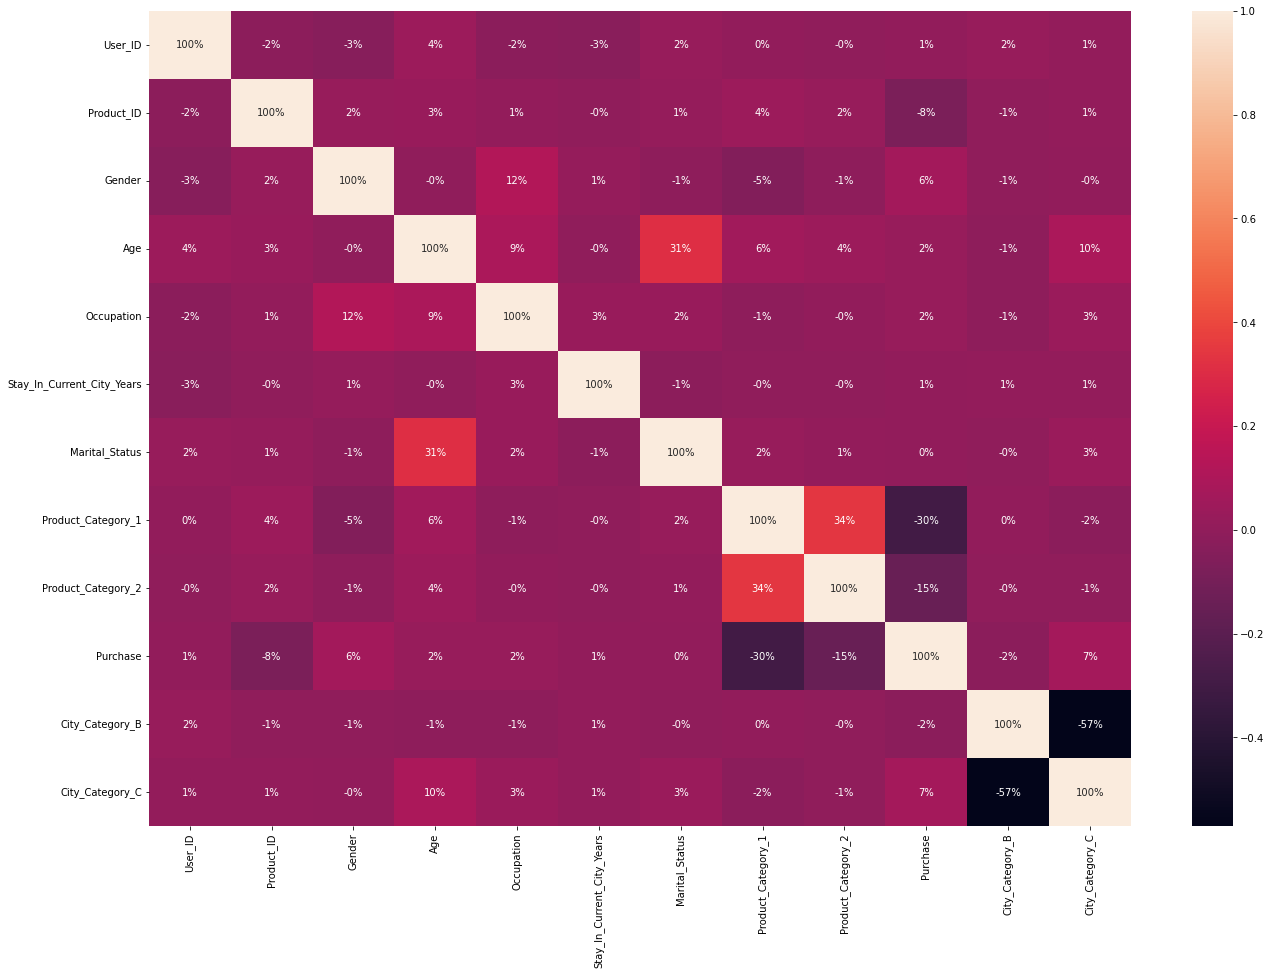

In [62]:
#Heatmap to show the correlation between various variables of the train data set
# let's check correlation using heatmap
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(),annot =True,fmt  = '.0%')

### Skewness

In [63]:
df.skew().sort_values()

Gender                       -1.171181
Product_Category_2           -0.161967
User_ID                       0.004182
Product_ID                    0.131452
Age                           0.243659
Stay_In_Current_City_Years    0.316397
City_Category_B               0.319604
Marital_Status                0.369216
Occupation                    0.401297
Purchase                      0.622198
Product_Category_1            0.771758
City_Category_C               0.824151
dtype: float64

## Dividing data in features and label

In [64]:
x = df.drop('Purchase',axis = 1)
x.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_B,City_Category_C
0,1,69042,0,9,10,2,0,3,8,0,0
1,1,248942,0,9,10,2,0,1,6,0,0
2,1,87842,0,9,10,2,0,12,5,0,0
3,1,85442,0,9,10,2,0,12,14,0,0
4,2,285442,1,60,16,4,0,8,9,0,1


In [65]:
y=df['Purchase']

### Removal of skewness using Power Transformer as values are negative we are using 'yeo-johnson' method for removing skewness

In [66]:
from sklearn.preprocessing import PowerTransformer
p_transform = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(p_transform.fit_transform(x), columns=x.columns)
x.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_B,City_Category_C
0,-2.209964,-0.979483,-1.744431,-2.590937,0.498020,0.238018,-0.832290,-0.467449,-0.315498,-0.852886,-0.669501
1,-2.209964,0.768411,-1.744431,-2.590937,0.498020,0.238018,-0.832290,-1.383363,-0.720240,-0.852886,-0.669501
2,-2.209964,-0.754316,-1.744431,-2.590937,0.498020,0.238018,-0.832290,1.561595,-0.929662,-0.852886,-0.669501
3,-2.209964,-0.782096,-1.744431,-2.590937,0.498020,0.238018,-0.832290,1.561595,0.821250,-0.852886,-0.669501
4,-2.205742,1.058978,0.573253,2.090559,1.130860,1.492741,-0.832290,0.855490,-0.118916,-0.852886,1.493650
5,-2.201915,0.298425,0.573253,-0.318343,1.036385,0.910630,-0.832290,-1.383363,-1.599955,-0.852886,-0.669501
6,-2.198357,0.221661,0.573253,1.140995,0.096571,0.238018,1.201505,-1.383363,-0.315498,1.172489,-0.669501
7,-2.198357,1.516217,0.573253,1.140995,0.096571,0.238018,1.201505,-1.383363,1.002438,1.172489,-0.669501
8,-2.198357,-0.647850,0.573253,1.140995,0.096571,0.238018,1.201505,-1.383363,1.181749,1.172489,-0.669501
9,-2.194999,0.976727,0.573253,-0.318343,1.477550,-0.579278,1.201505,0.855490,-0.315498,-0.852886,-0.669501


In [67]:
pd.DataFrame(x).skew().sort_values()

Gender                       -1.171181
User_ID                      -0.276059
Product_ID                   -0.257988
Product_Category_2           -0.240565
Occupation                   -0.156286
Stay_In_Current_City_Years   -0.070054
Product_Category_1           -0.064101
Age                           0.001948
City_Category_B               0.319604
Marital_Status                0.369216
City_Category_C               0.824151
dtype: float64

### Every value will be reduced after transformation

In [68]:
# data scaling formula z = (x-mean)/std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)
x_scaled

array([[-2.20996363, -0.97948298, -1.74443061, ..., -0.31549768,
        -0.85288615, -0.66950108],
       [-2.20996363,  0.76841076, -1.74443061, ..., -0.72023998,
        -0.85288615, -0.66950108],
       [-2.20996363, -0.75431565, -1.74443061, ..., -0.92966176,
        -0.85288615, -0.66950108],
       ...,
       [ 1.56941647, -1.53309534,  0.57325295, ..., -1.59995531,
         1.17248944, -0.66950108],
       [ 1.56941647, -0.55124626,  0.57325295, ..., -0.31549768,
         1.17248944, -0.66950108],
       [ 1.56941647,  0.50603396,  0.57325295, ..., -1.59995531,
         1.17248944, -0.66950108]])

## Final features Multi-Collinearity Check using VIF**


In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Features List"]=x.columns
vif_data["VIF Value"]=[variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
vif_data

,Features List,VIF Value
0,User_ID,1.005205
1,Product_ID,1.003033
2,Gender,1.020052
3,Age,1.127877
4,Occupation,1.021092
5,Stay_In_Current_City_Years,1.002701
6,Marital_Status,1.107273
7,Product_Category_1,1.155592
8,Product_Category_2,1.145689
9,City_Category_B,1.491150


### There is no sign of Multi-collinearity


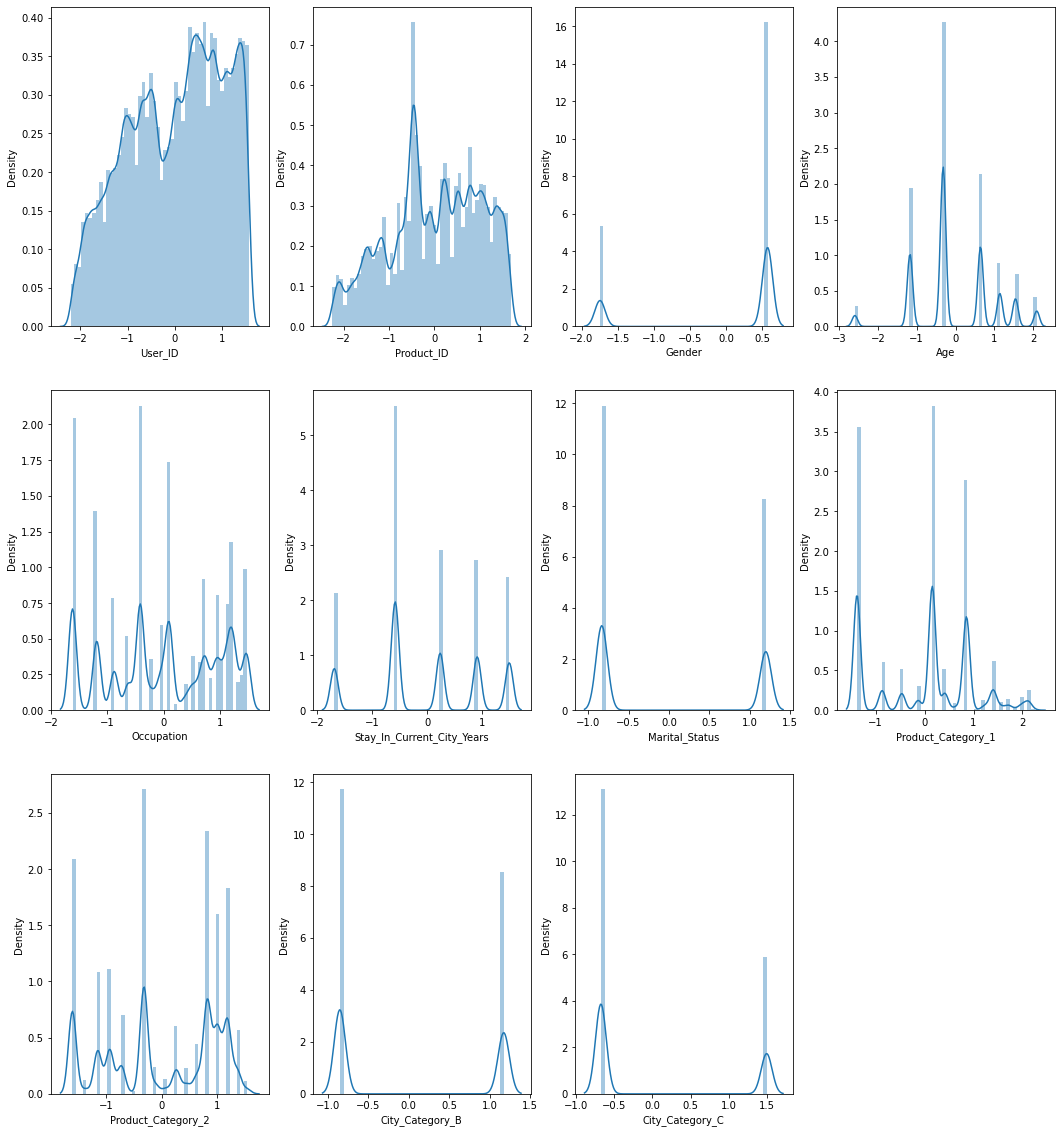

In [70]:
# let's visualize the data after correcting skewness
plt.figure(figsize=(18,20))
plotnumber=1
for column in x:
    if plotnumber<=12:
        plt.subplot(3,4,plotnumber)
        ax=sns.distplot(x[column])
        
    plotnumber+=1
    
plt.show()    

### Skewness has been corrected and data is distributed normally. Now ,our model is ready for model building


# Model selection/predictions


## Regression because our Target variable 'Purchase' is continuous.


In [71]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

### Finding the best Random state and maximum accuracy

In [72]:
maxAccu=0
maxRS=0

for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.1750629652596759 on Random State 363


**Splitting the data into Training and Testing**

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=363)

**I am defining a function for splitting of the Training and Testing features alongwith Target, then it trains the model soon after training it predicts the Target and calculates RMSE score with R2 score alongwith this it calculates the Cross Validation score and finally it finds the difference between the R2 score and Cross Validation score.**

In [74]:
# Regression Model Function

def reg(model, x, y):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=363)
    
    #Training the model
    model.fit(X_train, Y_train)
    
    #Predicting Y_test
    pred = model.predict(X_test)
    
    #RMSE
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    #R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    #CV Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    #Difference
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

## Linear Regression

In [75]:
#Linear regression
model=LinearRegression()
reg(model, x, y)

RMSE Score is: 4504.221343428112
R2 Score is: 17.506296525967592
Cross Validation Score: 16.87664717060616
R2 Score - Cross Validation Score is 0.6296493553614333


**Ridge Regression**

In [76]:
# Ridge Regression

model=Ridge(alpha=1e-2, normalize=True)
reg(model, x, y)

RMSE Score is: 4504.500641237785
R2 Score is: 17.496065667722704
Cross Validation Score: 16.874945075755917
R2 Score - Cross Validation Score is 0.6211205919667862


## Decision Tree Regressor

In [77]:
# Decision Tree Regressor
model=DecisionTreeRegressor(criterion="poisson")
reg(model, x, y)

RMSE Score is: 4039.518028929964
R2 Score is: 33.650072218896796
Cross Validation Score: 33.481776272564986
R2 Score - Cross Validation Score is 0.1682959463318099


## Random Forest Regressor

In [78]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, x, y)

RMSE Score is: 4375.5758835941
R2 Score is: 22.151223229008988
Cross Validation Score: 21.036408480709817
R2 Score - Cross Validation Score is 1.114814748299171


## KNeighbors Regressor

In [79]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model,x,y)

RMSE Score is: 4353.610002797515
R2 Score is: 22.93088047085433
Cross Validation Score: 21.72850796014986
R2 Score - Cross Validation Score is 1.2023725107044712


## Save the model

In [81]:
import joblib
dt=DecisionTreeRegressor()
joblib.dump(dt,'Black Friday.pkl')

['Black Friday.pkl']